In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

from matplotlib import pyplot as plt
%matplotlib inline 

import seaborn as sns

In [2]:
df_gdrate = pd.read_table('/Users/sheenaschier/Documents/Workdir/datasets/filesncesrate.txt')
print(df_gdrate.head())

        CDS_CODE       COUNTY                            DISTRICT  \
0              0  State Total                         State Total   
1  1000000000000      Alameda                        County Total   
2  1100170000000      Alameda  Alameda County Office of Education   
3  1100170109835      Alameda  Alameda County Office of Education   
4  1100170112607      Alameda  Alameda County Office of Education   

                                   SCHOOL     D9    D10    D11    D12   GRADS  \
0                             State Total  17375  15168  23395  42078  405087   
1                            County Total    631    470    738   1448   13926   
2                          District Total     46    102    122    132     139   
3                     FAME Public Charter     12      3      4      3      54   
4  Envision Academy for Arts & Technology      6      1      4      0      26   

   GRADRATE  YEAR  
0      80.5   910  
1      80.9   910  
2      25.7   910  
3      71.1   910 

In [3]:
len(df_gdrate)
highschool_mask = ((df_gdrate['GRADRATE'] >0.0)&(df_gdrate['SCHOOL'] !='District Total')&(df_gdrate['SCHOOL'] !='State Total')&(df_gdrate['SCHOOL'] !='County Total'))
#print(highschool1)
#highschool2 = df_gdrate['GRADRATE'] >0
#print(highschool1*highschool2)
df_gdrate['highschool'] = (highschool_mask)
#print(df_gdrate[['SCHOOL', 'GRADRATE', 'highschool']])
print(len(df_gdrate[df_gdrate['highschool'] == True]))
highschool = df_gdrate[df_gdrate['highschool'] == True]
#print(highschool)

2185


In [4]:
df_enr = pd.read_table('/Users/sheenaschier/Documents/Workdir/datasets/filesenr.0910.txt')
#df_enr = pd.read_csv('/Users/sheenaschier/Documents/Workdir/datasets/filesenr.asp.csv')
df_enr=df_enr.rename(columns = {'ADULT':'adult'})
print(df_enr.head())

        CDS_CODE        COUNTY            DISTRICT                    SCHOOL  \
0  7617546004097  Contra Costa  Mt. Diablo Unified  Hidden Valley Elementary   
1  7617546004097  Contra Costa  Mt. Diablo Unified  Hidden Valley Elementary   
2  7617546004097  Contra Costa  Mt. Diablo Unified  Hidden Valley Elementary   
3  7617546004097  Contra Costa  Mt. Diablo Unified  Hidden Valley Elementary   
4  7617546004097  Contra Costa  Mt. Diablo Unified  Hidden Valley Elementary   

   ETHNIC GENDER  KDGN  GR_1  GR_2  GR_3  GR_4  GR_5  GR_6  GR_7  GR_8  \
0       6      M     3     0     3     2     1     0     0     0     0   
1       4      F     1     3     4     2     4     1     0     0     0   
2       3      F     1     0     0     1     0     1     0     0     0   
3       7      F    23    43    33    30    41    33     0     0     0   
4       1      F     0     1     0     3     0     0     0     0     0   

   UNGR_ELM  GR_9  GR_10  GR_11  GR_12  UNGR_SEC  ENR_TOTAL  adult  
0    

Code 0 = Not reported

Code 1 = American Indian or Alaska Native, Not Hispanic

Code 2 = Asian, Not Hispanic

Code 3 = Pacific Islander, Not Hispanic

Code 4 = Filipino, Not Hispanic

Code 5 = Hispanic or Latino

Code 6 = African American, not Hispanic

Code 7 = White, not Hispanic

Code 9 = Two or More Races, Not Hispanic


In [5]:
female = df_enr['GENDER'] == 'F'
male = df_enr['GENDER'] == 'M'
ethnic_not_reported = df_enr['ETHNIC'] == 0
ethnic_asian = df_enr['ETHNIC'] == 1
ethnic_native = df_enr['ETHNIC'] == 2
ethnic_pacific_islander = df_enr['ETHNIC'] == 3
ethnic_filipino = df_enr['ETHNIC'] == 4
ethnic_hispanic = df_enr['ETHNIC'] == 5
ethnic_african_american = df_enr['ETHNIC'] == 6
ethnic_white = df_enr['ETHNIC'] == 7
ethnic_multi = df_enr['ETHNIC'] == 9

df_female_not = df_enr[(female) & (ethnic_not_reported)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'GR_9', 'GR_10', 'GR_11', 'GR_12', 'adult'])

df_male_not = df_enr[(male) & (ethnic_not_reported)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'GR_9', 'GR_10', 'GR_11', 'GR_12', 'adult'])
                                                                   
df_female_asi = df_enr[(female) & (ethnic_asian)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'GR_9', 'GR_10', 'GR_11', 'GR_12', 'adult'])

df_male_asi = df_enr[(male) & (ethnic_asian)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'GR_9', 'GR_10', 'GR_11', 'GR_12', 'adult'])

df_female_nat = df_enr[(female) & (ethnic_native)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'GR_9', 'GR_10', 'GR_11', 'GR_12', 'adult'])

df_male_nat = df_enr[(male) & (ethnic_native)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'GR_9', 'GR_10', 'GR_11', 'GR_12', 'adult'])

df_female_pac = df_enr[(female) & (ethnic_pacific_islander)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'GR_9', 'GR_10', 'GR_11', 'GR_12', 'adult'])

df_male_pac = df_enr[(male) & (ethnic_pacific_islander)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'GR_9', 'GR_10', 'GR_11', 'GR_12', 'adult'])

df_female_fil = df_enr[(female) & (ethnic_filipino)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'GR_9', 'GR_10', 'GR_11', 'GR_12', 'adult'])

df_male_fil = df_enr[(male) & (ethnic_filipino)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'GR_9', 'GR_10', 'GR_11', 'GR_12', 'adult'])

df_female_his = df_enr[(female) & (ethnic_hispanic)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'GR_9', 'GR_10', 'GR_11', 'GR_12', 'adult'])

df_male_his = df_enr[(male) & (ethnic_hispanic)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'GR_9', 'GR_10', 'GR_11', 'GR_12', 'adult'])   

df_female_afr = df_enr[(female) & (ethnic_african_american)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'GR_9', 'GR_10', 'GR_11', 'GR_12', 'adult'])

df_male_afr = df_enr[(male) & (ethnic_african_american)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'GR_9', 'GR_10', 'GR_11', 'GR_12', 'adult'])
                                                                   
df_female_whi = df_enr[(female) & (ethnic_white)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'GR_9', 'GR_10', 'GR_11', 'GR_12', 'adult'])
                                                                   
df_male_whi = df_enr[(male) & (ethnic_white)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'GR_9', 'GR_10', 'GR_11', 'GR_12', 'adult'])     
                                                                   
df_female_mul = df_enr[(female) & (ethnic_multi)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'GR_9', 'GR_10', 'GR_11', 'GR_12', 'adult'])
                                                                   
df_male_mul = df_enr[(male) & (ethnic_multi)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'GR_9', 'GR_10', 'GR_11', 'GR_12', 'adult']) 
                                                                   
                                                                       
not_join = pd.merge(df_female_not, df_male_not, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer', suffixes=('_f_not', '_m_not'))
asi_join = pd.merge(df_female_asi, df_male_asi, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer', suffixes=('_f_asi', '_m_asi'))
nat_join = pd.merge(df_female_nat, df_male_nat, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer', suffixes=('_f_nat', '_m_nat'))
pac_join = pd.merge(df_female_pac, df_male_pac, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer', suffixes=('_f_pac', '_m_pac'))
fil_join = pd.merge(df_female_fil, df_male_fil, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer', suffixes=('_f_fil', '_m_fil'))
his_join = pd.merge(df_female_his, df_male_his, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer', suffixes=('_f_his', '_m_his'))
afr_join = pd.merge(df_female_afr, df_male_afr, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer', suffixes=('_f_afr', '_m_afr'))
whi_join = pd.merge(df_female_whi, df_male_whi, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer', suffixes=('_f_whi', '_m_whi'))
mul_join = pd.merge(df_female_mul, df_male_mul, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer', suffixes=('_f_mul', '_m_mul'))

join_1 = pd.merge(not_join, asi_join, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer')   
join_2 = pd.merge(join_1, nat_join, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer')
join_3 = pd.merge(join_2, pac_join, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer')                                                            
join_4 = pd.merge(join_3, fil_join, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer')
join_5 = pd.merge(join_4, his_join, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer')                                                            
join_6 = pd.merge(join_5, afr_join, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer')
join_7 = pd.merge(join_6, whi_join, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer')
join_8 = pd.merge(join_7, mul_join, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer')                                                            
                                                                                                                                                                                                                                          

                                                          

In [292]:
rate_join = pd.merge(df_gdrate, join_8, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer')

In [281]:
print(len(rate_join))
print(len(join_8))
print(len(df_gdrate))
print(join_8)


12425
10153
7543
             CDS_CODE          COUNTY  \
0       7617706004451    Contra Costa   
1       7617546004063    Contra Costa   
2       7617960730598    Contra Costa   
3       7617966004659    Contra Costa   
4       7617706004477    Contra Costa   
5       7617706066583    Contra Costa   
6       7617966004857    Contra Costa   
7       7617880735407    Contra Costa   
8       7617886004576    Contra Costa   
9       7617886084966    Contra Costa   
10      7617960101477    Contra Costa   
11      7617960115352    Contra Costa   
12      7617706004444    Contra Costa   
13      7617880116863    Contra Costa   
14      7617706004501    Contra Costa   
15      7617886004568    Contra Costa   
16      7617966004758    Contra Costa   
17      7617886004535    Contra Costa   
18      7617886004543    Contra Costa   
19      7617966005003    Contra Costa   
20      7617886061162    Contra Costa   
21      7617886109383    Contra Costa   
22      7617960732941    Contra Costa   

             CDS_CODE          COUNTY  \
0                   0     State Total   
1       1000000000000         Alameda   
2       1100170000000         Alameda   
3       1100170109835         Alameda   
4       1100170112607         Alameda   
5       1100170118489         Alameda   
6       1100170130401         Alameda   
7       1100170130419         Alameda   
8       1100170130427         Alameda   
9       1316090000000         Alameda   
10      1316090131755         Alameda   
11      1316170000000         Alameda   
12      1316170131763         Alameda   
13      1611190000000         Alameda   
14      1611190000001         Alameda   
15      1611190106401         Alameda   
16      1611190119222         Alameda   
17      1611190130229         Alameda   
18      1611190130609         Alameda   
19      1611190130625         Alameda   
20      1611190132878         Alameda   
21      1611190134304         Alameda   
22      1611196000004         Alameda   
23      16111960

In [293]:
enr_grad = rate_join.fillna(value=0)
enr_grad['enr_afr'] = enr_grad.ENR_TOTAL_f_afr+enr_grad.ENR_TOTAL_m_afr
enr_grad['enr_asi'] = enr_grad.ENR_TOTAL_f_asi+enr_grad.ENR_TOTAL_m_asi
enr_grad['enr_fil'] = enr_grad.ENR_TOTAL_f_fil+enr_grad.ENR_TOTAL_m_fil
enr_grad['enr_his'] = enr_grad.ENR_TOTAL_f_his+enr_grad.ENR_TOTAL_m_his
enr_grad['enr_mul'] = enr_grad.ENR_TOTAL_f_mul+enr_grad.ENR_TOTAL_m_mul
enr_grad['enr_nat'] = enr_grad.ENR_TOTAL_f_nat+enr_grad.ENR_TOTAL_m_nat
enr_grad['enr_not'] = enr_grad.ENR_TOTAL_f_not+enr_grad.ENR_TOTAL_m_not
enr_grad['enr_pac'] = enr_grad.ENR_TOTAL_f_pac+enr_grad.ENR_TOTAL_m_pac
enr_grad['enr_whi'] = enr_grad.ENR_TOTAL_f_whi+enr_grad.ENR_TOTAL_m_whi
enr_grad['enr_tot'] = enr_grad.enr_afr+enr_grad.enr_asi+enr_grad.enr_fil+enr_grad.enr_his+enr_grad.enr_nat+enr_grad.enr_not+enr_grad.enr_pac+enr_grad.enr_whi



In [294]:
enr_grad['afr_f_ratio'] = enr_grad.ENR_TOTAL_f_afr/enr_grad.enr_tot
enr_grad['afr_m_ratio'] = enr_grad.ENR_TOTAL_m_afr/enr_grad.enr_tot
enr_grad['asi_f_ratio'] = enr_grad.ENR_TOTAL_f_asi/enr_grad.enr_tot
enr_grad['asi_m_ratio'] = enr_grad.ENR_TOTAL_m_asi/enr_grad.enr_tot
enr_grad['fil_f_ratio'] = enr_grad.ENR_TOTAL_f_fil/enr_grad.enr_tot
enr_grad['fil_m_ratio'] = enr_grad.ENR_TOTAL_m_fil/enr_grad.enr_tot
enr_grad['his_f_ratio'] = enr_grad.ENR_TOTAL_f_his/enr_grad.enr_tot
enr_grad['his_m_ratio'] = enr_grad.ENR_TOTAL_m_his/enr_grad.enr_tot
enr_grad['nat_f_ratio'] = enr_grad.ENR_TOTAL_f_nat/enr_grad.enr_tot
enr_grad['nat_m_ratio'] = enr_grad.ENR_TOTAL_m_nat/enr_grad.enr_tot
enr_grad['not_f_ratio'] = enr_grad.ENR_TOTAL_f_not/enr_grad.enr_tot
enr_grad['not_m_ratio'] = enr_grad.ENR_TOTAL_m_not/enr_grad.enr_tot
enr_grad['pac_f_ratio'] = enr_grad.ENR_TOTAL_f_pac/enr_grad.enr_tot
enr_grad['pac_m_ratio'] = enr_grad.ENR_TOTAL_m_pac/enr_grad.enr_tot
enr_grad['whi_f_ratio'] = enr_grad.ENR_TOTAL_f_whi/enr_grad.enr_tot
enr_grad['whi_m_ratio'] = enr_grad.ENR_TOTAL_m_whi/enr_grad.enr_tot
enr_grad['mul_f_ratio'] = enr_grad.ENR_TOTAL_f_mul/enr_grad.enr_tot
enr_grad['mul_m_ratio'] = enr_grad.ENR_TOTAL_m_mul/enr_grad.enr_tot

In [295]:
enr_grad['afr_ratio'] = enr_grad.enr_afr/enr_grad.enr_tot
enr_grad['asi_ratio'] = enr_grad.enr_asi/enr_grad.enr_tot
enr_grad['fil_ratio'] = enr_grad.enr_fil/enr_grad.enr_tot
enr_grad['his_ratio'] = enr_grad.enr_his/enr_grad.enr_tot
enr_grad['nat_ratio'] = enr_grad.enr_nat/enr_grad.enr_tot
enr_grad['not_ratio'] = enr_grad.enr_not/enr_grad.enr_tot
enr_grad['pac_ratio'] = enr_grad.enr_pac/enr_grad.enr_tot
enr_grad['whi_ratio'] = enr_grad.enr_whi/enr_grad.enr_tot
enr_grad['mul_ratio'] = enr_grad.enr_mul/enr_grad.enr_tot

In [296]:
enr_grad = enr_grad.fillna(value=0)
print(enr_grad)

             CDS_CODE          COUNTY  \
0                   0     State Total   
1       1000000000000         Alameda   
2       1100170000000         Alameda   
3       1100170109835         Alameda   
4       1100170112607         Alameda   
5       1100170118489         Alameda   
6       1100170130401         Alameda   
7       1100170130419         Alameda   
8       1100170130427         Alameda   
9       1316090000000         Alameda   
10      1316090131755         Alameda   
11      1316170000000         Alameda   
12      1316170131763         Alameda   
13      1611190000000         Alameda   
14      1611190000001         Alameda   
15      1611190106401         Alameda   
16      1611190119222         Alameda   
17      1611190130229         Alameda   
18      1611190130609         Alameda   
19      1611190130625         Alameda   
20      1611190132878         Alameda   
21      1611190134304         Alameda   
22      1611196000004         Alameda   
23      16111960

In [297]:
enr_grad.to_csv('ENR_GRD.csv', index=False)

In [5]:
df_grad = pd.read_table('/Users/sheenaschier/Documents/Workdir/datasets/filesgrads.txt')
print(df_grad.head())

        CDS_CODE  ETHNIC GENDER  GRADS  UC_GRADS  YEAR
0  1100170112607       1      M      1         1  1617
1  1100170112607       6      F     13        13  1617
2  1100170112607       6      M     11        11  1617
3  1100170112607       7      F      1         1  1617
4  1100170112607       7      M      4         4  1617


In [6]:
df_drp = pd.read_table('/Users/sheenaschier/Documents/Workdir/datasets/filesdropouts.txt')
print(df_drp.head())

        CDS_CODE  ETHNIC GENDER  E7  E8  E9  E10  E11  E12  EUS  ETOT  D7  D8  \
0  1100170112607       1      M   0   0   0    0    1    1    0     2   0   0   
1  1100170112607       1      F   0   0   1    0    2    0    0     3   0   0   
2  1100170112607       2      M   0   0   0    0    0    1    0     1   0   0   
3  1100170112607       2      F   0   0   2    2    2    1    0     7   0   0   
4  1100170112607       3      M   0   0   0    1    0    0    0     1   0   0   

   D9  D10  D11  D12  DUS  DTOT  YEAR  
0   0    0    0    0    0     0  1617  
1   0    0    0    0    0     0  1617  
2   0    0    0    0    0     0  1617  
3   1    0    0    0    0     1  1617  
4   0    0    0    0    0     0  1617  


In [124]:
print(df_gdrate.shape, df_gdrate.dtypes)
print(df_enr.shape, df_enr.dtypes)
print(df_grad.shape, df_grad.dtypes)
print(df_drp.shape, df_drp.dtypes)

(7543, 11) CDS_CODE      int64
COUNTY       object
DISTRICT     object
SCHOOL       object
D9            int64
D10           int64
D11           int64
D12           int64
GRADS         int64
GRADRATE    float64
YEAR          int64
dtype: object
(124714, 23) CDS_CODE      int64
COUNTY       object
DISTRICT     object
SCHOOL       object
ETHNIC        int64
GENDER       object
KDGN          int64
GR_1          int64
GR_2          int64
GR_3          int64
GR_4          int64
GR_5          int64
GR_6          int64
GR_7          int64
GR_8          int64
UNGR_ELM      int64
GR_9          int64
GR_10         int64
GR_11         int64
GR_12         int64
UNGR_SEC      int64
ENR_TOTAL     int64
ADULT         int64
dtype: object
(21607, 6) CDS_CODE     int64
ETHNIC       int64
GENDER      object
GRADS        int64
UC_GRADS     int64
YEAR         int64
dtype: object
(59599, 20) CDS_CODE     int64
ETHNIC       int64
GENDER      object
E7           int64
E8           int64
E9           int64
E10

In [23]:
def obj_filter(df):
    object_filter = (df.dtypes == 'object')
    return object_filter


In [24]:
for feature in df_drp.dtypes[obj_filter(df_drp)].index:
    print(feature)
#print (df_drp.dtypes[obj_filter(df_drp)])
print (df_drp.head())

GENDER
        CDS_CODE  ETHNIC GENDER  E7  E8  E9  E10  E11  E12  EUS  ETOT  D7  D8  \
0  1100170112607       1      M   0   0   0    0    1    1    0     2   0   0   
1  1100170112607       1      F   0   0   1    0    2    0    0     3   0   0   
2  1100170112607       2      M   0   0   0    0    0    1    0     1   0   0   
3  1100170112607       2      F   0   0   2    2    2    1    0     7   0   0   
4  1100170112607       3      M   0   0   0    1    0    0    0     1   0   0   

   D9  D10  D11  D12  DUS  DTOT  YEAR  
0   0    0    0    0    0     0  1617  
1   0    0    0    0    0     0  1617  
2   0    0    0    0    0     0  1617  
3   1    0    0    0    0     1  1617  
4   0    0    0    0    0     0  1617  


In [125]:
for feature in df_enr.dtypes[obj_filter(df_enr)].index:
    print(feature)
#print (df_enr.dtypes[obj_filter(df_enr)])
print (df_enr.head())

COUNTY
DISTRICT
SCHOOL
GENDER
        CDS_CODE        COUNTY            DISTRICT                    SCHOOL  \
0  7617546004097  Contra Costa  Mt. Diablo Unified  Hidden Valley Elementary   
1  7617546004097  Contra Costa  Mt. Diablo Unified  Hidden Valley Elementary   
2  7617546004097  Contra Costa  Mt. Diablo Unified  Hidden Valley Elementary   
3  7617546004097  Contra Costa  Mt. Diablo Unified  Hidden Valley Elementary   
4  7617546004097  Contra Costa  Mt. Diablo Unified  Hidden Valley Elementary   

   ETHNIC GENDER  KDGN  GR_1  GR_2  GR_3  GR_4  GR_5  GR_6  GR_7  GR_8  \
0       6      M     3     0     3     2     1     0     0     0     0   
1       4      F     1     3     4     2     4     1     0     0     0   
2       3      F     1     0     0     1     0     1     0     0     0   
3       7      F    23    43    33    30    41    33     0     0     0   
4       1      F     0     1     0     3     0     0     0     0     0   

   UNGR_ELM  GR_9  GR_10  GR_11  GR_12  UNGR

In [11]:
for feature in df_grad.dtypes[obj_filter(df_grad)].index:
    print(feature)
#print (df_grad.dtypes[obj_filter(df_grad)])
print (df_grad.head())

GENDER
        CDS_CODE  ETHNIC GENDER  GRADS  UC_GRADS  YEAR
0  1100170112607       1      M      1         1  1617
1  1100170112607       6      F     13        13  1617
2  1100170112607       6      M     11        11  1617
3  1100170112607       7      F      1         1  1617
4  1100170112607       7      M      4         4  1617


In [54]:
# Plot histogram grid
#df_enr.groupby('CDS_CODE').hist(figsize=(14,14), xrot=-15)
#new_list = df_enr.groupby('CDS_CODE')
#print(new_list.get_group('1100170112607'))
# Clear the text "residue"
#plt.show()

test_grp = df_enr.groupby(['CDS_CODE', 'ETHNIC','GENDER'])
#len(df_enr.groupby('CDS_CODE'))
len(test_grp)
test_grp.nth([0])
#test_grp.hist(figsize=(14,14))
#plt.plot()


ADULT   COUNTY  \
CDS_CODE       ETHNIC GENDER                   
1100170112607  1      F           0  Alameda   
                      M           0  Alameda   
               2      F           0  Alameda   
                      M           0  Alameda   
               3      F           0  Alameda   
                      M           0  Alameda   
               4      M           0  Alameda   
               5      F           0  Alameda   
                      M           0  Alameda   
               6      F           0  Alameda   
                      M           0  Alameda   
               7      F           0  Alameda   
                      M           0  Alameda   
               9      M           0  Alameda   
1100170123968  0      F           0  Alameda   
                      M           0  Alameda   
               1      F           0  Alameda   
                      M           0  Alameda   
               2      F           0  Alameda   
                      M           0  Alameda   
               3      M           0  Alameda   
               4      M           0  Alameda   
               5      F           0  Alameda   
                      M           0  Alameda   
               6      F           0  Alameda   
                      M           0  Alameda   
               7      F           0  Alameda   
                      M           0  Alameda   
               9      F           0  Alameda   
                      M           0  Alameda   
...                             ...      ...   
58727516118806 4      M           0     Yuba   
               5      F           0     Yuba   
                      M           0     Yuba   
               6      F           0     Yuba   
                      M           0     Yuba   
               7      F           0     Yuba   
                      M           0     Yuba   
               9      F           0     Yuba   
                      M           0     Yuba   
58727690000001 5      M           0     Yuba   
58727690123570 5      M           0     Yuba   
               7      F           0     Yuba   
                      M           0     Yuba   
58727695838305 0      F           0     Yuba   
                      M           0     Yuba   
               1      F           0     Yuba   
                      M           0     Yuba   
               2      F           0     Yuba   
                      M           0     Yuba   
               3      M           0     Yuba   
               4      F           0     Yuba   
                      M           0     Yuba   
               5      F           0     Yuba   
                      M           0     Yuba   
               6      F           0     Yuba   
                      M           0     Yuba   
               7      F           0     Yuba   
                      M           0     Yuba   
               9      F           0     Yuba   
                      M           0     Yuba   

                                                        DISTRICT  ENR_TOTAL  \
CDS_CODE       ETHNIC GENDER                                                  
1100170112607  1      F       Alameda County Office of Education          3   
                      M       Alameda County Office of Education          2   
               2      F       Alameda County Office of Education          7   
                      M       Alameda County Office of Education          1   
               3      F       Alameda County Office of Education          4   
                      M       Alameda County Office of Education          1   
               4      M       Alameda County Office of Education          1   
               5      F       Alameda County Office of Education        110   
                      M       Alameda County Office of Education        102   
               6      F       Alameda County Office of Education         81   
                      M       Alameda County Office of Ed

In [14]:
df_enr

,CDS_CODE,COUNTY,DISTRICT,SCHOOL,ETHNIC,GENDER,KDGN,GR_1,GR_2,GR_3,GR_4,GR_5,GR_6,GR_7,GR_8,UNGR_ELM,GR_9,GR_10,GR_11,GR_12,UNGR_SEC,ENR_TOTAL,ADULT
0,1611196090054,Alameda,Alameda Unified,Lincoln Middle,2,F,0,0,0,0,0,0,34,48,60,0,0,0,0,0,0,142,0
1,1611196090054,Alameda,Alameda Unified,Lincoln Middle,1,M,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,1611196090054,Alameda,Alameda Unified,Lincoln Middle,3,F,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,5,0
3,1611196090054,Alameda,Alameda Unified,Lincoln Middle,7,M,0,0,0,0,0,0,52,51,50,0,0,0,0,0,0,153,0
4,1611196090054,Alameda,Alameda Unified,Lincoln Middle,0,M,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
5,1611196090054,Alameda,Alameda Unified,Lincoln Middle,5,F,0,0,0,0,0,0,13,14,9,0,0,0,0,0,0,36,0
6,1611196090054,Alameda,Alameda Unified,Lincoln Middle,6,F,0,0,0,0,0,0,4,6,6,0,0,0,0,0,0,16,0
7,1611196090054,Alameda,Alameda Unified,Lincoln Middle,6,M,0,0,0,0,0,0,4,3,6,0,0,0,0,0,0,13,0
8,1611196090054,Alameda,Alameda Unified,Lincoln Middle,1,F,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
9,1611196090054,Alameda,Alameda Unified,Lincoln Middle,9,F,0,0,0,0,0,0,16,11,6,0,0,0,0,0,0,33,0


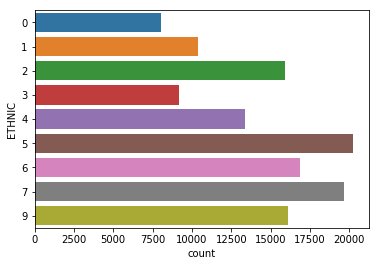

In [55]:
sns.countplot(y='ETHNIC', data=df_enr)


    Code 0 = Not reported
    Code 1 = American Indian or Alaska Native, Not Hispanic
    Code 2 = Asian, Not Hispanic
    Code 3 = Pacific Islander, Not Hispanic
    Code 4 = Filipino, Not Hispanic
    Code 5 = Hispanic or Latino
    Code 6 = African American, not Hispanic
    Code 7 = White, not Hispanic
    Code 9 = Two or More Races, Not Hispanic


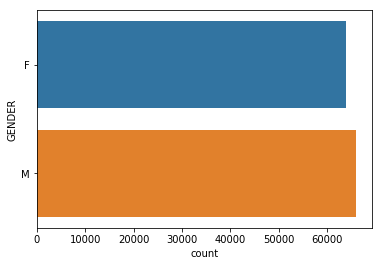

In [56]:
sns.countplot(y='GENDER', data=df_enr)

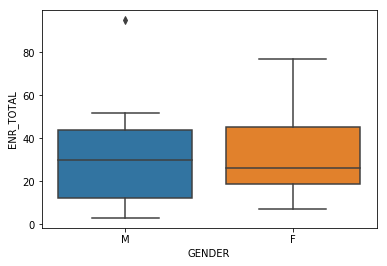

In [102]:
sns.boxplot(y='ENR_TOTAL', x='GENDER', data=df_enr[df_enr['CDS_CODE'] == 1611196090112])
#df_enr['CDS_CODE'] == 1611196090112

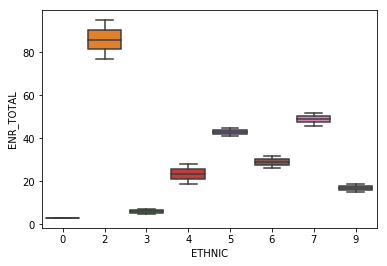

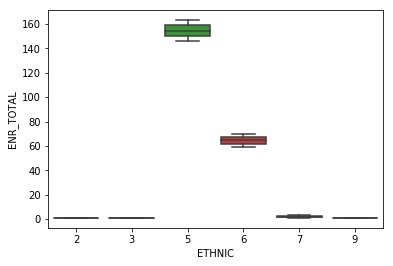

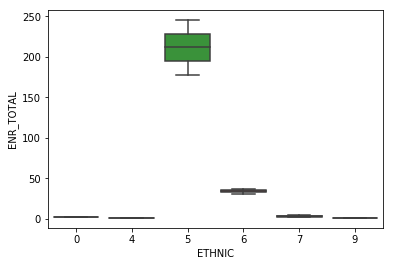

In [105]:
sns.boxplot(y='ENR_TOTAL', x='ETHNIC', data=df_enr[df_enr['CDS_CODE'] == 1611196090112])
plt.show()
sns.boxplot(y='ENR_TOTAL', x='ETHNIC', data=df_enr[df_enr['CDS_CODE'] == 19647330126508])
plt.show()
sns.boxplot(y='ENR_TOTAL', x='ETHNIC', data=df_enr[df_enr['CDS_CODE'] == 19647330126490])
plt.show()

In [122]:
school_grp = df_enr.groupby('CDS_CODE')
len(school_grp)

10483

In [96]:
#sns.countplot(y='ETHNIC', data=gen_grp)
#for feature in gen_grp:
#    print(gen_grp['ETHNIC'].plot())
#    plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


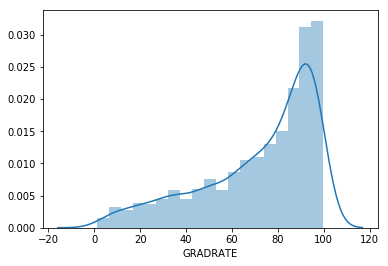

In [236]:
#sns.distplot(df_gdrate.GRADRATE)
sns.distplot(highschool.GRADRATE)

In [250]:
df_join = pd.read_csv('/Users/sheenaschier/Documents/Workdir/datasets/rate_join.csv', low_memory=False)

In [251]:
df_join.shape

(12425, 67)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


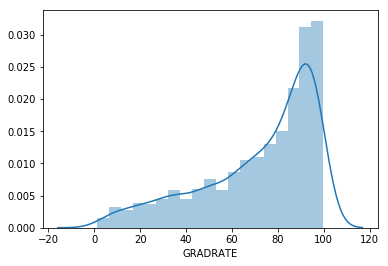

In [255]:
hs = df_join[df_join['highschool'] == True]
#hs = df_join[df_join['GRADRATE'] >0]
sns.distplot(hs.GRADRATE)

In [260]:
df_test = pd.read_csv('/Users/sheenaschier/Documents/Workdir/datasets/ENR_GRD.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [262]:
print (df_test)

       Unnamed: 0        CDS_CODE          COUNTY  \
0               0               0     State Total   
1               1   1000000000000         Alameda   
2               2   1100170000000         Alameda   
3               3   1100170109835         Alameda   
4               4   1100170112607         Alameda   
5               5   1100170118489         Alameda   
6               6   1100170130401         Alameda   
7               7   1100170130419         Alameda   
8               8   1100170130427         Alameda   
9               9   1316090000000         Alameda   
10             10   1316090131755         Alameda   
11             11   1316170000000         Alameda   
12             12   1316170131763         Alameda   
13             13   1611190000000         Alameda   
14             14   1611190000001         Alameda   
15             15   1611190106401         Alameda   
16             16   1611190119222         Alameda   
17             17   1611190130229         Alam